In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. Import data

In [23]:
import os

labels = os.listdir("flowers/")
labels

# ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

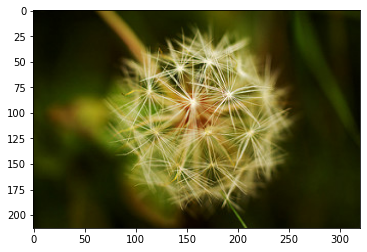

In [4]:
# dandelion

import matplotlib.pyplot as plt
plt.imshow(plt.imread('flowers/dandelion/10043234166_e6dd915111_n.jpg'))

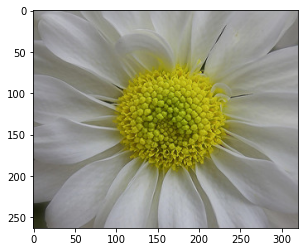

In [5]:
# daisy

plt.imshow(plt.imread('flowers/daisy/100080576_f52e8ee070_n.jpg'))

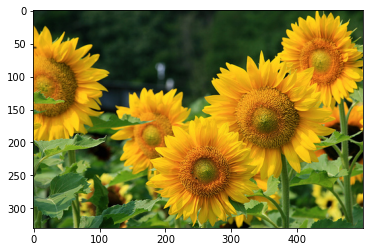

In [6]:
# sunflower

plt.imshow(plt.imread('flowers/sunflower/1008566138_6927679c8a.jpg'))

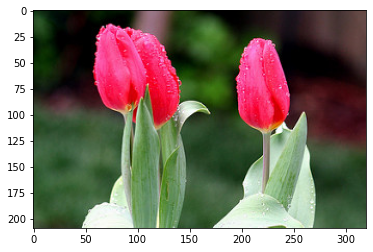

In [7]:
# tulip

plt.imshow(plt.imread('flowers/tulip/100930342_92e8746431_n.jpg'))

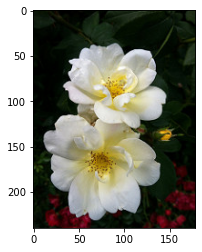

In [8]:
# rose

plt.imshow(plt.imread('flowers/rose/10090824183_d02c613f10_m.jpg'))

In [9]:
tulip_data = plt.imread('flowers/tulip/100930342_92e8746431_n.jpg')
tulip_data

array([[[ 19,  46,  15],
        [ 16,  47,  16],
        [ 14,  47,  16],
        ...,
        [103,  74,  70],
        [102,  74,  70],
        [100,  75,  70]],

       [[ 19,  48,  17],
        [ 17,  50,  19],
        [ 16,  51,  19],
        ...,
        [101,  73,  69],
        [101,  73,  69],
        [ 99,  74,  69]],

       [[ 21,  52,  21],
        [ 19,  54,  21],
        [ 18,  55,  22],
        ...,
        [102,  74,  70],
        [102,  74,  70],
        [100,  75,  70]],

       ...,

       [[ 78,  93,  70],
        [ 78,  93,  70],
        [ 76,  91,  68],
        ...,
        [ 71, 105,  72],
        [ 72, 105,  74],
        [ 73, 106,  75]],

       [[ 80,  92,  70],
        [ 79,  91,  69],
        [ 75,  89,  66],
        ...,
        [ 73, 106,  75],
        [ 73, 106,  75],
        [ 75, 108,  77]],

       [[ 83,  93,  66],
        [ 77,  93,  67],
        [ 69,  88,  66],
        ...,
        [ 76, 107,  75],
        [ 76, 107,  75],
        [ 76, 107,  75]]

In [10]:
tulip_data.shape

(209, 320, 3)

In [11]:
rose_data = plt.imread('flowers/rose/10090824183_d02c613f10_m.jpg')
rose_data.shape

(240, 179, 3)

(240, 179, 3)

In [15]:
labels = ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
col_to_title = {
    'dandelion': 'dandelion', 
    'daisy': 'daisy', 
    'sunflower': 'sunflower', 
    'tulip': 'tulip',
    'rose': 'rose'
}

# 2. Data split to train and validation data

In [33]:
batch_size = 32
img_height = 224
img_width = 224

In [35]:
data_folder = pathlib.Path('flowers/')

In [36]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
                  data_folder,
                  validation_split=0.3,
                  subset="training",
                  seed=2210,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_ds = image_dataset_from_directory(data_folder,
                                        validation_split=0.3,
                                        subset="validation",
                                        seed=2210,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3022 files for training.
Found 4317 files belonging to 5 classes.
Using 1295 files for validation.


In [37]:
class_name=train_ds.class_names
class_name

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# 3. Build a Model

In [38]:
import tensorflow as tf 

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation=Sequential(
    [
    layers.RandomFlip(mode='horizontal',input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
    ],name='data_augmentation_layer')

In [40]:
num_classes=len(class_name)
num_classes

5

In [41]:
model=Sequential([
    data_augmentation,
    
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=num_classes)
])

In [42]:
model.compile(
    optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                        

# 3. Fit and Save a Model

In [44]:
history = model.fit(x = train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
95/95 [==============================] - 426s 4s/step - loss: 11.8651 - accuracy: 0.3630 - val_loss: 1.2612 - val_accuracy: 0.4896
Epoch 2/20
95/95 [==============================] - 218s 2s/step - loss: 1.2352 - accuracy: 0.5026 - val_loss: 1.1956 - val_accuracy: 0.4927
Epoch 3/20
95/95 [==============================] - 149s 2s/step - loss: 1.1695 - accuracy: 0.5288 - val_loss: 1.2257 - val_accuracy: 0.4973
Epoch 4/20
95/95 [==============================] - 143s 2s/step - loss: 1.1230 - accuracy: 0.5563 - val_loss: 1.2581 - val_accuracy: 0.5120
Epoch 5/20
95/95 [==============================] - 144s 2s/step - loss: 1.0544 - accuracy: 0.5801 - val_loss: 1.0724 - val_accuracy: 0.5838
Epoch 6/20
95/95 [==============================] - 142s 1s/step - loss: 0.9929 - accuracy: 0.6092 - val_loss: 1.0461 - val_accuracy: 0.6062
Epoch 7/20
95/95 [==============================] - 134s 1s/step - loss: 0.9422 - accuracy: 0.6496 - val_loss: 1.0060 - val_accuracy: 0.6031
Epoch 8/20
9

# 4. Evaluate the model

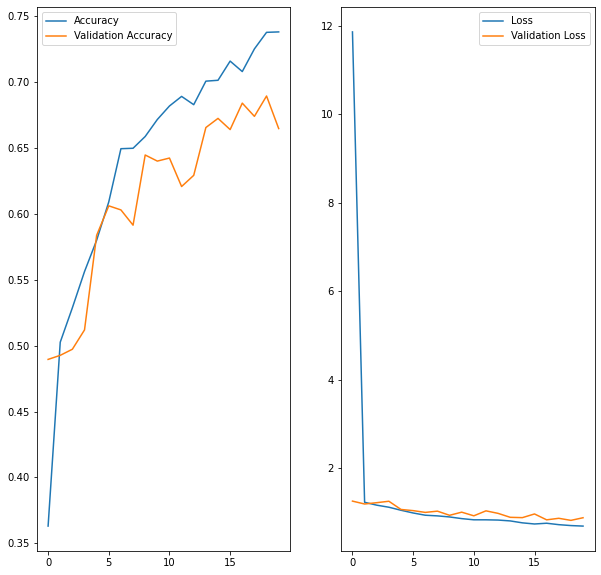

In [45]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

# 5. Test the model

1/1 [==============================] - 0s 38ms/step


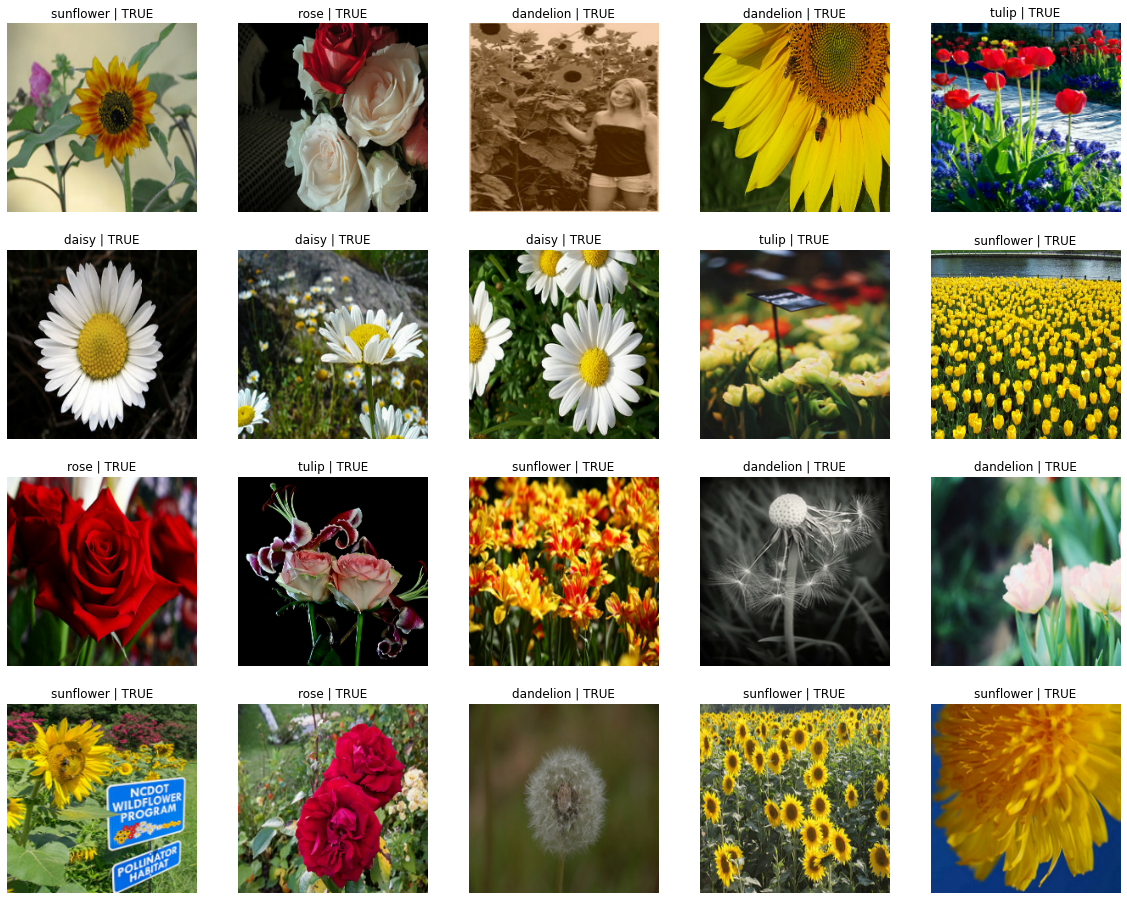

In [46]:
plt.figure(figsize=(20, 16))
class_names = ['daisy', 'dandelion', 'rose',  'sunflower', 'tulip']
result = ' | False'
for images, labels in val_ds.take(1):
    for i in range(20):
        
        ax = plt.subplot(4, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")